In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
# Importing necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# prediction is(0.75)
# model = GradientBoostingRegressor(
#     n_estimators=300,
#     learning_rate=0.05,
#     max_depth=4
# ) 

#  load data set
df = pd.read_csv("student_data.csv")
pd.DataFrame()
# encode data corigal columns, # Convert text to numbers
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# X = everything except G3
X = df.drop("G3", axis=1)
y = df["G3"]
x_train , x_test , y_train, y_test = train_test_split(X,y , test_size=0.2,random_state=42 )
# Scale
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# train the model linear regression
model = GradientBoostingRegressor() # prediction is (0.83)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# train the model randomforestclassifier (prediction is 0.63)
# classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# classifier.fit(x_train, y_train)
# y_pred = classifier.predict(x_test)
# Accuracy
print("r2_score:", r2_score(y_test, y_pred))
model.feature_importances_


r2_score: 0.8365053981327139


array([1.29358578e-05, 3.51650189e-04, 1.29814934e-02, 0.00000000e+00,
       2.55073724e-07, 1.73774150e-04, 5.28015221e-04, 2.08107390e-03,
       2.79382029e-03, 2.39531151e-03, 4.60586556e-03, 4.08445669e-03,
       1.75414946e-03, 2.99155556e-03, 4.40371468e-04, 2.52031217e-03,
       3.76562094e-04, 1.80058562e-04, 2.08051856e-03, 8.02631722e-05,
       8.61210874e-05, 1.72757193e-04, 5.68163541e-03, 5.21530267e-03,
       8.06466994e-04, 2.82335682e-03, 6.46912819e-04, 2.00585027e-03,
       3.37713819e-03, 1.38742655e-01, 1.76616419e-02, 7.82347719e-01])

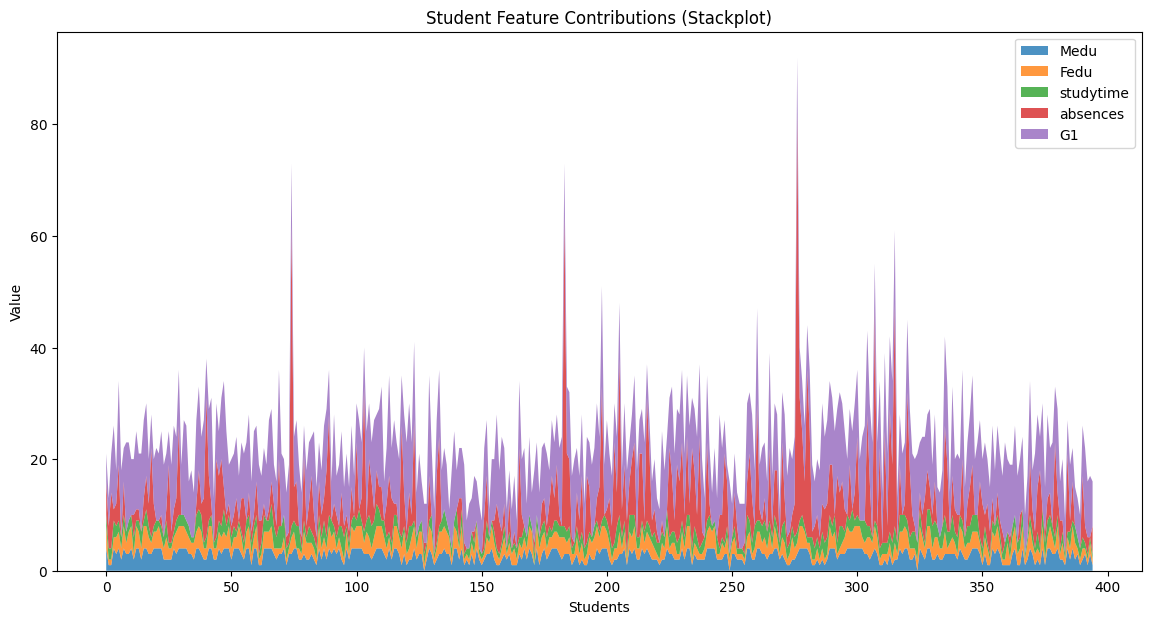

In [2]:
import matplotlib.pyplot as plt

# Numeric columns
numeric_cols = ['age','Medu','Fedu','studytime','absences','G1','G2','G3']

# For stackplot, pick first 5 features
cols_to_plot = ['Medu','Fedu','studytime','absences','G1']
labels = cols_to_plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# X-axis = student index
x = df.index

plt.figure(figsize=(14,7))
plt.stackplot(x, 
              df['Medu'], 
              df['Fedu'], 
              df['studytime'], 
              df['absences'], 
              df['G1'],
              labels=labels,
              colors=colors,
              alpha=0.8)

plt.xlabel("Students")
plt.ylabel("Value")
plt.title("Student Feature Contributions (Stackplot)")
plt.legend(loc='upper right')
plt.show()


In [4]:

df = pd.read_csv("student_data.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
